### Academic honesty statement



**This is an exam problem. You are required to be in class to work on this. By turning this in you certify that it is your own work and you have not received any unauthorized assistance.**

Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### Solving stiff ODEs



The ODE $y' = -20 y + 20 x^2 + 2 x, y(0)=1$ has the solution $y=e^{-20x} + x^2$. The large negative exponential is a fast changing function compared to the quadratic term, which suggests this is a stiff differential equation. It is not so stiff that it is a problem to solve numerically though. We will explore two approaches to solve this ODE.

First, use solve\_ivp to get a numerical solution to this ODE over the range $x=0$ to $x=1$ and compare it to the analytical solution.



### Backward Euler method



Stiff ODEs can be challenging to solve with standard integrators because you need small steps if you integrate forward like we did with the forward Euler method, especially where the solution changes quickly. An alternative approach is the *backward Euler formula*, which tends to be more accurate for stiff systems. If we have $y' = f(x, y)$ and an initial condition, then we can estimate the next value using this formula:

$y_{n+1} = y_n + h f(x_{n+1}, y_{n+1})$

In this formula $x_{n+1} = x_n + h$ and $h$ is the integration step size. The backward Euler formula is *implicit* in $y_{n+1}$:

$y_{n+1} = y_n + h(-20 y_{n+1} + 20x_{n+1}^2 + 2 x_{n+1})$

You can solve for $y_{n+1}$ analytically in this problem:

$y_{n+1} = (y_n + h (20 x_{n+1}^2 + 2 x_{n+1})) / ( 1 + 20 h)$.

Double check that formula, then use it to find a solution to the ODE. Compare your solution to the analytical solution.



### Solution



The first part of this problem is just setting up an ode function, integrating it, and then plotting it with the analytical solution. The two solutions should be visually indistinguishable.



# Out [25]:
# text/plain
Text(0, 0.5, 'y')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

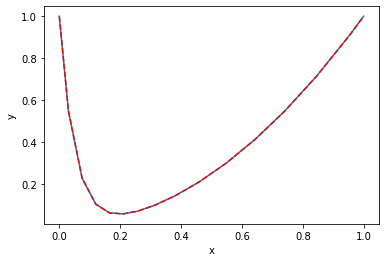

In [1]:
def ode(x, y):
    return -20 * y + 20 * x**2 + 2*x

y0 = (1,)
xspan = (0, 1)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

sol = solve_ivp(ode, xspan, y0)
plt.plot(sol.t, sol.y.T)
plt.plot(sol.t, np.exp(-20 * sol.t) + sol.t**2, 'r--')
plt.xlabel('x')
plt.ylabel('y')

You should say that these are visually indistinguishable, which indicates we found a good solution.



#### Backward Euler Method



To implement the backward Euler method, you need to make a loop that iterates over the x-values in the range you want a solution over. I use linspace to make this array, and return the h value that separates them. You need an h small enough to give a good answer. Then, you just iterate over the values to compute the next value. Keeping the indexes straight in the loop limit is probably the hardest part of this.



# Out [27]:
# text/plain
Text(0, 0.5, 'y')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

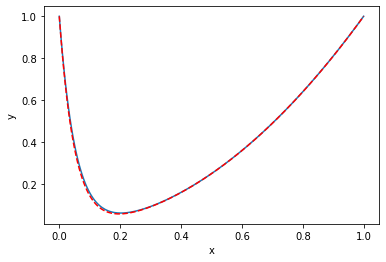

In [1]:
x, h = np.linspace(0, 1, 200, retstep=True)
y = np.zeros_like(x)
y[0] = 1  # This is the initial condition

for n in range(0, len(x) - 1):
    y[n + 1] = (y[n] + h * (20 * x[n+1]**2 + 2 * x[n+1])) / (1 + 20 * h)

plt.plot(x, y)
plt.plot(x, np.exp(-20 * x) + x**2, 'r--')
plt.xlabel('x')
plt.ylabel('y')

There is a small difference in the solution from the backward Euler method, and it can be made smaller by using more points (or equivalently a smaller h). Here we double the number of points to see that.



# Out [28]:
# text/plain
Text(0, 0.5, 'y')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

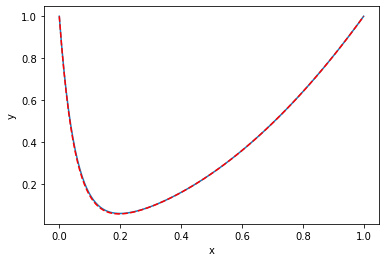

In [1]:
x, h = np.linspace(0, 1, 400, retstep=True)
y = np.zeros_like(x)
y[0] = 1  # This is the initial condition

for n in range(0, len(x) - 1):
    y[n + 1] = (y[n] + h * (20 * x[n+1]**2 + 2 * x[n+1])) / (1 + 20 * h)

plt.plot(x, y)
plt.plot(x, np.exp(-20 * x) + x**2, 'r--')
plt.xlabel('x')
plt.ylabel('y')